In [36]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
from numpy import array
from keras.layers import Dense, Dropout
import pandas as pd
import gc
# fit an LSTM network to training data
from keras import optimizers
from keras import callbacks
from keras.layers.normalization import BatchNormalization
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,20

In [37]:
df1 = pd.read_csv('sensex1.csv', parse_dates = ['Date'], index_col = 'Date')
df1 = df1['2015-01-20' : '2019-01-18']

In [38]:
df2 = pd.read_csv('NYSE.csv', parse_dates = ['Date'], index_col = 'Date')
df2 = df2['2015-01-20' : '2019-01-18']

In [39]:
df3 = pd.read_csv('Exchange.csv', parse_dates = ['Unnamed: 1'], index_col = 'Unnamed: 1')
df3 = df3['2015-01-20' : '2019-01-18']

In [40]:
df1 = df1.drop(['High', 'Open'], axis = 1)

In [41]:
df1 = df1.drop(['Low', 'Volume'], axis = 1)

In [42]:
df1 = df1.drop(['Adj Close'], axis = 1)

In [43]:
df1['SENSEX'] = df1.Close

In [44]:
df1 = df1.drop(['Close'], axis = 1)

In [45]:
df1['NYSE'] = df2.Close

In [46]:
df1['Exc'] = df3.exc 

In [47]:
df1 = df1['2015-01-20' : ]
df1[df1==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df1.dropna()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,28784.669922,10658.629883,61.8475
2015-01-21,28888.859375,10720.400391,61.6140
2015-01-22,29006.019531,10859.349609,61.6910
2015-01-23,29278.839844,10788.330078,61.4988
2015-01-27,29571.039063,10781.830078,61.4640
2015-01-28,29559.179688,10603.860352,61.4105
2015-01-29,29681.769531,10691.629883,61.4998
2015-01-30,29182.949219,10537.219727,61.7575
2015-02-02,29122.269531,10669.030273,61.8840


In [48]:
df1 = df1.dropna()
df1 = df1.asfreq('D', method="pad")

In [49]:
temp1 = np.array(df1['SENSEX'])
temp2 = np.array(df1['NYSE'])
temp3 = np.array(df1['Exc'])

In [50]:
temp1 = temp1.reshape(-1,1)
temp2 = temp2.reshape(-1,1)
temp3 = temp3.reshape(-1,1)

In [51]:
temp1.shape

(1459, 1)

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler.fit_transform(temp1)
scaled_data2 = scaler.fit_transform(temp2)
scaled_data3 = scaler.fit_transform(temp3)

In [53]:
df1['SENSEX'] = scaled_data1
df1['NYSE'] = scaled_data2
df1['Exc'] = scaled_data3

In [54]:
df1

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,0.365815,0.362366,0.033675
2015-01-21,0.372349,0.376108,0.015682
2015-01-22,0.379697,0.407022,0.021615
2015-01-23,0.396807,0.391221,0.006804
2015-01-24,0.396807,0.391221,0.006804
2015-01-25,0.396807,0.391221,0.006804
2015-01-26,0.396807,0.391221,0.006804
2015-01-27,0.415133,0.389775,0.004123
2015-01-28,0.414389,0.350180,0.000000


In [55]:
df1.head()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,0.365815,0.362366,0.033675
2015-01-21,0.372349,0.376108,0.015682
2015-01-22,0.379697,0.407022,0.021615
2015-01-23,0.396807,0.391221,0.006804
2015-01-24,0.396807,0.391221,0.006804


In [56]:
import statsmodels.api as sm

In [57]:
dta = sm.datasets.macrodata.load_pandas().data

In [58]:
cycle1, trend1 = sm.tsa.filters.hpfilter(df1.SENSEX, 1600)

In [59]:
cycle2, trend2 = sm.tsa.filters.hpfilter(df1.NYSE, 1600)

In [60]:
cycle3, trend3 = sm.tsa.filters.hpfilter(df1.Exc, 1600)

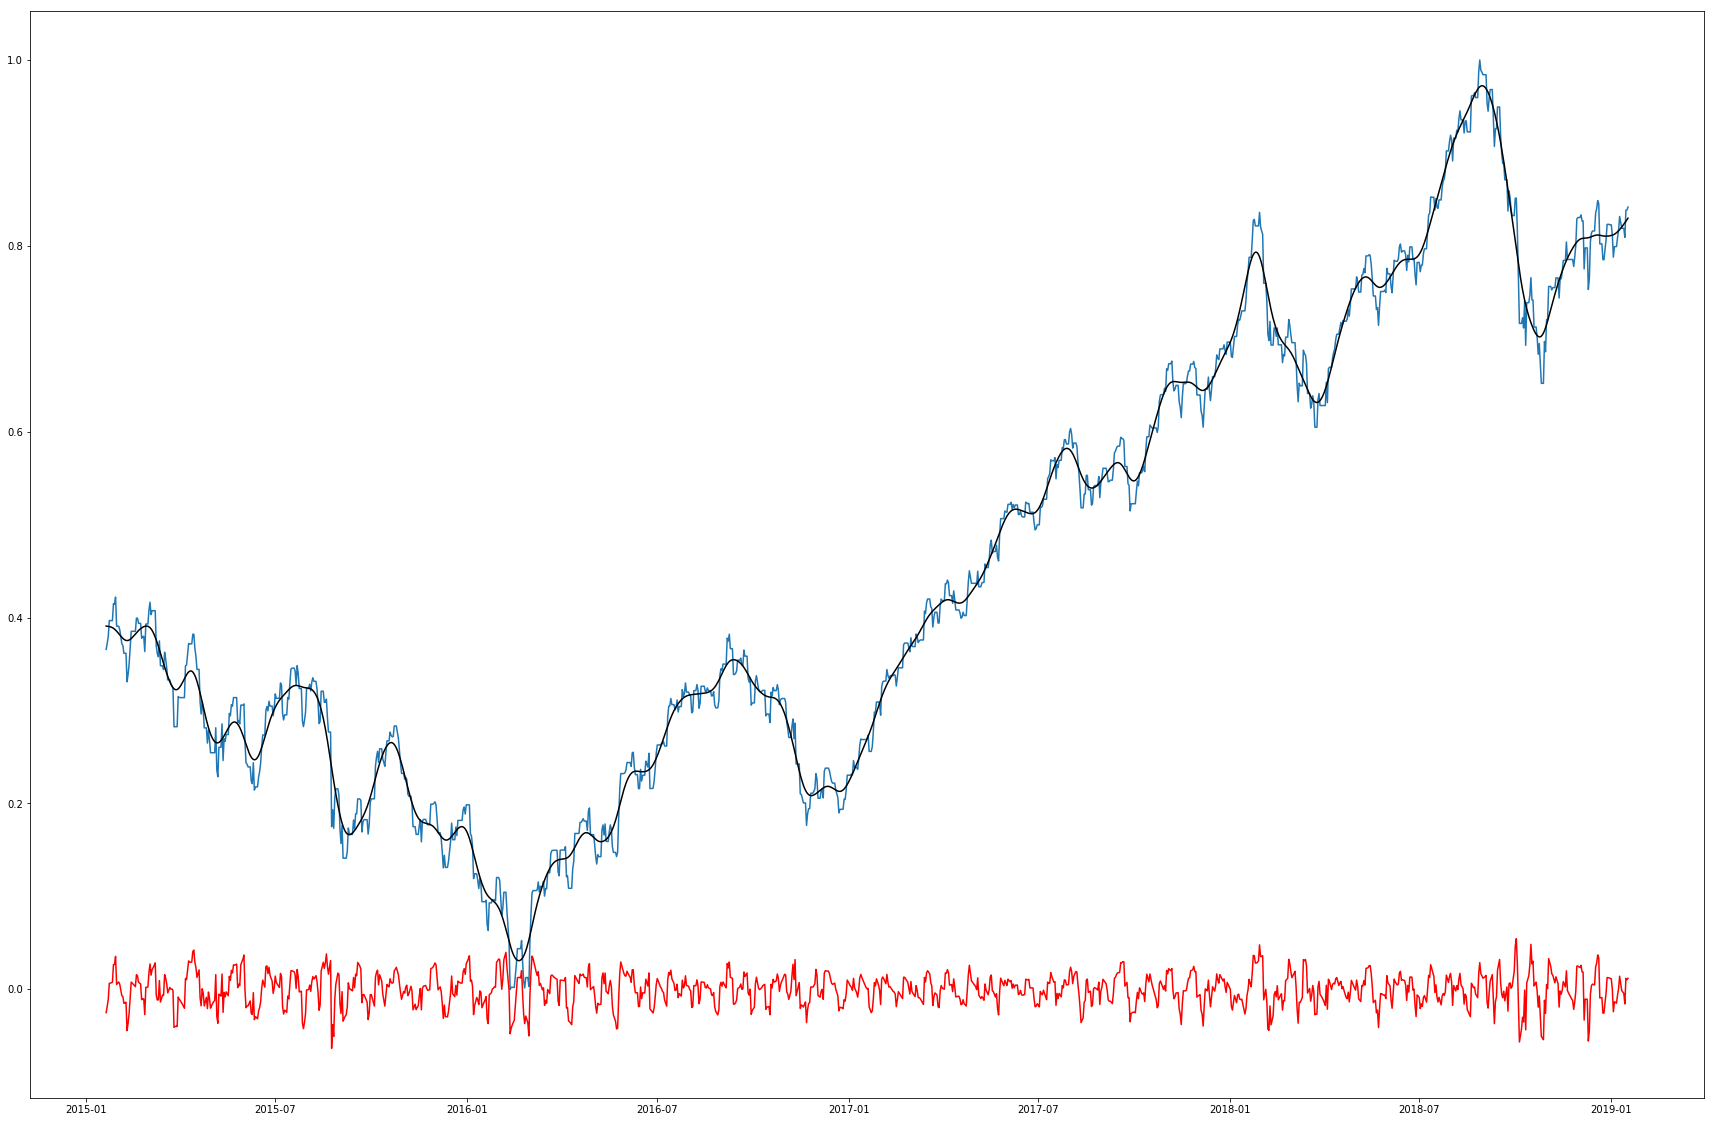

In [61]:
plt.plot(df1.SENSEX)
plt.plot(cycle1, color = 'red')
plt.plot(trend1, color='black')

In [62]:
df = pd.DataFrame()

In [65]:
df['SENSEX'] = cycle1
df['NYSE'] = cycle2
df['Exc'] = cycle3

In [66]:
df.head()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,-0.025089,-0.008583,0.024599
2015-01-21,-0.018407,0.004446,0.005641
2015-01-22,-0.010896,0.034651,0.010594
2015-01-23,0.006421,0.018149,-0.005232
2015-01-24,0.006704,0.017438,-0.006307


In [67]:
df = df['2015-01-20' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,-0.025089,-0.008583,0.024599
2015-01-21,-0.018407,0.004446,0.005641
2015-01-22,-0.010896,0.034651,0.010594
2015-01-23,0.006421,0.018149,-0.005232
2015-01-24,0.006704,0.017438,-0.006307
2015-01-25,0.007094,0.016684,-0.007463
2015-01-26,0.007617,0.015848,-0.008720
2015-01-27,0.026619,0.013431,-0.012773
2015-01-28,0.026723,-0.027331,-0.018389


In [68]:
df.shape

(1459, 3)

In [69]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i))  for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    #print(cols)
    #print(names)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    #print(agg)
    return agg

In [70]:
n_lag = 20
n_seq = 1
n_test = 39
n_epochs = 200
n_batch = 20
n_neurons = 10

In [71]:
supervised = series_to_supervised(df, n_lag, n_seq)

In [72]:
supervised[:10]

,var1(t-20),var2(t-20),var3(t-20),var1(t-19),var2(t-19),var3(t-19),var1(t-18),var2(t-18),var3(t-18),var1(t-17),...,var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-09,-0.025089,-0.008583,0.024599,-0.018407,0.004446,0.005641,-0.010896,0.034651,0.010594,0.006421,...,-0.010489,-0.014333,-0.002130,-0.012568,-0.013864,-0.006241,-0.014621,-0.044451,-0.015053,0.014568
2015-02-10,-0.018407,0.004446,0.005641,-0.010896,0.034651,0.010594,0.006421,0.018149,-0.005232,0.006704,...,-0.012568,-0.013864,-0.006241,-0.014621,-0.044451,-0.015053,0.014568,-0.036543,0.000488,-0.001020
2015-02-11,-0.010896,0.034651,0.010594,0.006421,0.018149,-0.005232,0.006704,0.017438,-0.006307,0.007094,...,-0.014621,-0.044451,-0.015053,0.014568,-0.036543,0.000488,-0.001020,-0.025792,-0.009422,0.011861
2015-02-12,0.006421,0.018149,-0.005232,0.006704,0.017438,-0.006307,0.007094,0.016684,-0.007463,0.007617,...,0.014568,-0.036543,0.000488,-0.001020,-0.025792,-0.009422,0.011861,-0.009490,0.010224,0.031540
2015-02-13,0.006704,0.017438,-0.006307,0.007094,0.016684,-0.007463,0.007617,0.015848,-0.008720,0.026619,...,-0.001020,-0.025792,-0.009422,0.011861,-0.009490,0.010224,0.031540,0.007765,0.016941,0.007444
2015-02-14,0.007094,0.016684,-0.007463,0.007617,0.015848,-0.008720,0.026619,0.013431,-0.012773,0.026723,...,0.011861,-0.009490,0.010224,0.031540,0.007765,0.016941,0.007444,0.006678,0.013344,0.006186
2015-02-15,0.007617,0.015848,-0.008720,0.026619,0.013431,-0.012773,0.026723,-0.027331,-0.018389,0.035429,...,0.031540,0.007765,0.016941,0.007444,0.006678,0.013344,0.006186,0.005475,0.010018,0.005111
2015-02-16,0.026619,0.013431,-0.012773,0.026723,-0.027331,-0.018389,0.035429,-0.009237,-0.013123,0.005316,...,0.007444,0.006678,0.013344,0.006186,0.005475,0.010018,0.005111,0.004202,0.006999,0.004213
2015-02-17,0.026723,-0.027331,-0.018389,0.035429,-0.009237,-0.013123,0.005316,-0.045343,0.005008,0.006603,...,0.006186,0.005475,0.010018,0.005111,0.004202,0.006999,0.004213,0.002901,0.004317,0.003484


In [73]:
supervised.drop(supervised.columns[[len(supervised.columns)-1]], axis=1, inplace=True)

In [74]:
supervised.drop(supervised.columns[[len(supervised.columns)-1]], axis=1, inplace=True)

In [75]:
supervised[:5]

,var1(t-20),var2(t-20),var3(t-20),var1(t-19),var2(t-19),var3(t-19),var1(t-18),var2(t-18),var3(t-18),var1(t-17),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-09,-0.025089,-0.008583,0.024599,-0.018407,0.004446,0.005641,-0.010896,0.034651,0.010594,0.006421,...,-0.015067,0.001889,-0.010489,-0.014333,-0.002130,-0.012568,-0.013864,-0.006241,-0.014621,-0.044451
2015-02-10,-0.018407,0.004446,0.005641,-0.010896,0.034651,0.010594,0.006421,0.018149,-0.005232,0.006704,...,-0.014333,-0.002130,-0.012568,-0.013864,-0.006241,-0.014621,-0.044451,-0.015053,0.014568,-0.036543
2015-02-11,-0.010896,0.034651,0.010594,0.006421,0.018149,-0.005232,0.006704,0.017438,-0.006307,0.007094,...,-0.013864,-0.006241,-0.014621,-0.044451,-0.015053,0.014568,-0.036543,0.000488,-0.001020,-0.025792
2015-02-12,0.006421,0.018149,-0.005232,0.006704,0.017438,-0.006307,0.007094,0.016684,-0.007463,0.007617,...,-0.044451,-0.015053,0.014568,-0.036543,0.000488,-0.001020,-0.025792,-0.009422,0.011861,-0.009490
2015-02-13,0.006704,0.017438,-0.006307,0.007094,0.016684,-0.007463,0.007617,0.015848,-0.008720,0.026619,...,-0.036543,0.000488,-0.001020,-0.025792,-0.009422,0.011861,-0.009490,0.010224,0.031540,0.007765


In [76]:
supervised_values = supervised.values
len(supervised_values)

1439

In [77]:
train, test = supervised_values[0:-n_test], supervised_values[-n_test:]

In [78]:
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    #print(train.shape)
    X, y = train[:, :-1], train[:, -1:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    #print(X)
    #print(y)
    #print(X.shape)
    #print(y.shape)
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(5, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dense(6, activation='relu'))
    model.add(Flatten())
    model.add(Dense(y.shape[1]))
    
    #adam = optimizers.Adam(lr=.001)

    #model.compile(loss='mean_squared_error', optimizer='adam')

    #learning_rate = 0.00004
    adam = optimizers.Adam(lr=.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer= adam)
    
    # sgd optimizer
    #sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer= sgd)
    
    #rmsprop optimizer
    #rmsprop=optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
    #model.compile(optimizer=rmsprop,loss='mse')
    
    # Early stopping callback
    #earlyStop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='min')
    
    # fit network
    for i in range(nb_epoch):
        #model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
        print("Iteration Number is:",i)
        # with callbacks
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
        model.reset_states()
        #learning_rate = learning_rate * 1/(1 + 0.000001 * (i+1))
    return model

In [79]:
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)

Iteration Number is: 0
Epoch 1/1
1400/1400 [==============================] - 3s 2ms/step - loss: 1.0505
Iteration Number is: 1
Epoch 1/1
1400/1400 [==============================] - 0s 175us/step - loss: 0.4212
Iteration Number is: 2
Epoch 1/1
1400/1400 [==============================] - 0s 155us/step - loss: 0.2369
Iteration Number is: 3
Epoch 1/1
1400/1400 [==============================] - 0s 164us/step - loss: 0.1484
Iteration Number is: 4
Epoch 1/1
1400/1400 [==============================] - 0s 163us/step - loss: 0.1132
Iteration Number is: 5
Epoch 1/1
1400/1400 [==============================] - 0s 166us/step - loss: 0.0863
Iteration Number is: 6
Epoch 1/1
1400/1400 [==============================] - 0s 148us/step - loss: 0.0649
Iteration Number is: 7
Epoch 1/1
1400/1400 [==============================] - 0s 194us/step - loss: 0.0537
Iteration Number is: 8
Epoch 1/1
1400/1400 [==============================] - 0s 163us/step - loss: 0.0457
Iteration Number is: 9
Epoch 1/1
1400/1

1400/1400 [==============================] - 0s 245us/step - loss: 5.1485e-04
Iteration Number is: 76
Epoch 1/1
1400/1400 [==============================] - 0s 251us/step - loss: 5.0136e-04
Iteration Number is: 77
Epoch 1/1
1400/1400 [==============================] - 0s 217us/step - loss: 5.6404e-04
Iteration Number is: 78
Epoch 1/1
1400/1400 [==============================] - 0s 205us/step - loss: 4.9933e-04
Iteration Number is: 79
Epoch 1/1
1400/1400 [==============================] - 0s 221us/step - loss: 4.7775e-04
Iteration Number is: 80
Epoch 1/1
1400/1400 [==============================] - 0s 217us/step - loss: 4.7143e-04
Iteration Number is: 81
Epoch 1/1
1400/1400 [==============================] - 0s 317us/step - loss: 4.5963e-04
Iteration Number is: 82
Epoch 1/1
1400/1400 [==============================] - 0s 309us/step - loss: 4.6733e-04
Iteration Number is: 83
Epoch 1/1
1400/1400 [==============================] - 0s 208us/step - loss: 4.4893e-04
Iteration Number is: 84
Ep

1400/1400 [==============================] - 0s 355us/step - loss: 2.4005e-04
Iteration Number is: 148
Epoch 1/1
1400/1400 [==============================] - 0s 281us/step - loss: 2.4282e-04
Iteration Number is: 149
Epoch 1/1
1400/1400 [==============================] - 0s 214us/step - loss: 2.4218e-04
Iteration Number is: 150
Epoch 1/1
1400/1400 [==============================] - 0s 232us/step - loss: 2.4728e-04
Iteration Number is: 151
Epoch 1/1
1400/1400 [==============================] - 0s 292us/step - loss: 2.3348e-04
Iteration Number is: 152
Epoch 1/1
1400/1400 [==============================] - 0s 282us/step - loss: 2.3889e-04
Iteration Number is: 153
Epoch 1/1
1400/1400 [==============================] - 0s 220us/step - loss: 2.3941e-04
Iteration Number is: 154
Epoch 1/1
1400/1400 [==============================] - 0s 232us/step - loss: 2.4124e-04
Iteration Number is: 155
Epoch 1/1
1400/1400 [==============================] - 0s 211us/step - loss: 2.4015e-04
Iteration Number i

In [80]:
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(n_batch, 1, X.shape[1])
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

In [81]:
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)-n_batch):
        X, y = test[i:n_batch+i, 0:-1], test[i:n_batch+i, -1:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

In [82]:
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)

In [170]:
forecasts[0]

[-0.056272417]

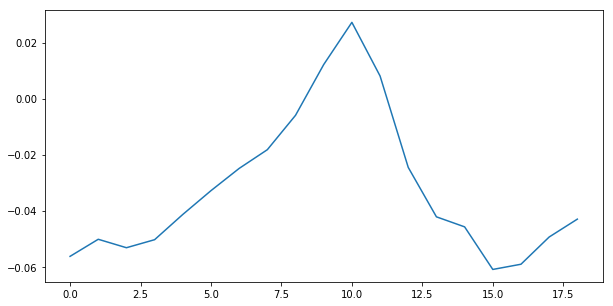

In [173]:
plt.plot(forecasts)
rcParams['figure.figsize'] = 10,5

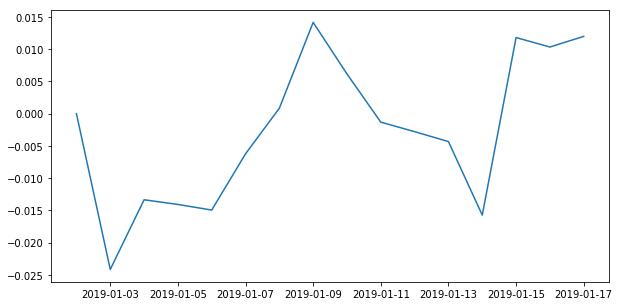

In [174]:
plt.plot(df.SENSEX[-16:])

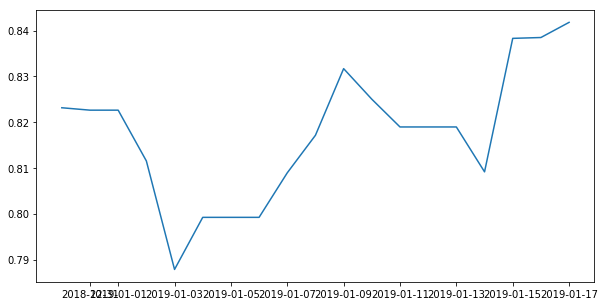

In [92]:
plt.plot(df1.SENSEX[-19:])